In [74]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv','geoloaction')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Dikshant23#23',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/DIKSHANT/Downloads/projects/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [3]:
db = mysql.connector.connect(host = 'localhost',
                             username = 'root',
                             password = 'Dikshant23#23',
                             database = 'ecommerce')

cur = db.cursor()

# List all unique cities where customers are located.

In [32]:
# Clear any previous unread result sets (this is the key fix)
while cur.nextset():
    pass

query = """SELECT DISTINCT customer_city FROM customers"""
cur.execute(query)
data = cur.fetchall()
data
df =  pd.DataFrame(data,columns = ["Customer City"])
df

,Customer City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


In [23]:
len(data)

4119

# Count the number of orders placed in 2017.


In [34]:
while cur.nextset():
    pass

query = """SELECT count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
print("total order placed in 2017 are :" ,data[0][0])


total order placed in 2017 are : 45101


# Find the total sales per category.


In [10]:
while cur.nextset():
    pass

query = """select upper(products.product_category) as category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category"""
cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data, columns = ["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [13]:
while cur.nextset():
    pass

query = """select sum(case when payment_installments >= 1 then 1
else 0 end)/count(*)*100 from payments;"""
cur.execute(query)
data = cur.fetchall()
data


[(Decimal('99.9981'),)]

# Count the number of customers from each state.

In [17]:
while cur.nextset():
    pass

query = """select customer_state, count(customer_id) as count from customers
group by customer_state;"""
cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data, columns = ["state", "count"])
df


,state,count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


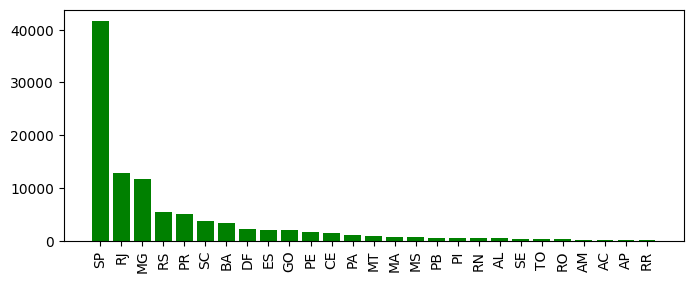

In [28]:
df = df.sort_values(by = "count", ascending = False)
plt.figure(figsize = (8,3))
plt.bar(df["state"],df["count"],color = "g")
plt.xticks(rotation = 90)
plt.show()

# Calculate the number of orders per month in 2018.

In [65]:

while cur.nextset():
    pass

query = """select monthname(order_purchase_timestamp) as months, count(order_id) from orders as count
where year(order_purchase_timestamp) = 2018
group by months"""
cur.execute(query)
data = cur.fetchall()
data

df = pd.DataFrame(data, columns = ["months","order count"])
df


,months,order count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


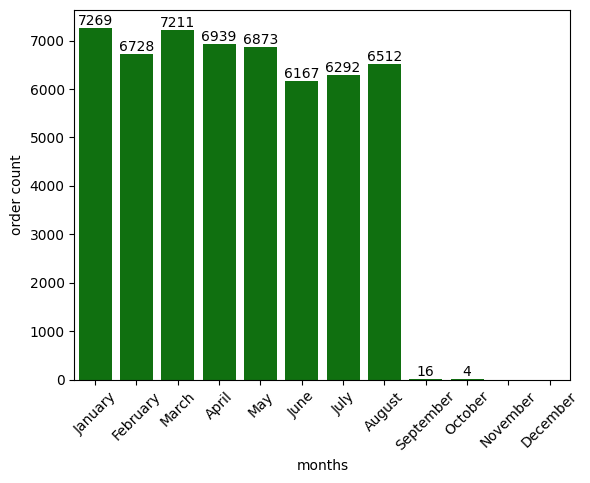

In [66]:
o = ["January","February","March","April","May","June","July","August","September","October","November","December"]
ax = sns.barplot(x = df["months"],y= df["order count"], color ="g",order = o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.show()

# Find the average number of products per order, grouped by customer city.

In [71]:
while cur.nextset():
    pass

query = """with count_per_order as
(select orders.order_id,orders.customer_id,
count(order_items.order_id) as order_count
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.order_count),2)
average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["City","Avg Products per Order"])
df

,City,Avg Products per Order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
...,...,...
4105,japaratuba,1.00
4106,sebastiao leal,1.00
4107,buriti,3.00
4108,morro agudo de goias,1.00


# Calculate the percentage of total revenue contributed by each product category.

In [73]:


while cur.nextset():
    pass

query = """select upper(products.product_category) as category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by sales_percentage desc"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category"," % of total revenue"])
df

,Category,% of total revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [6]:
import numpy as np

while cur.nextset():
    pass

query = """select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","order count","price"])

arr1 = df["order count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation between product price and the number of times a product has been purchased is", a[0][-1])

the correlation between product price and the number of times a product has been purchased is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

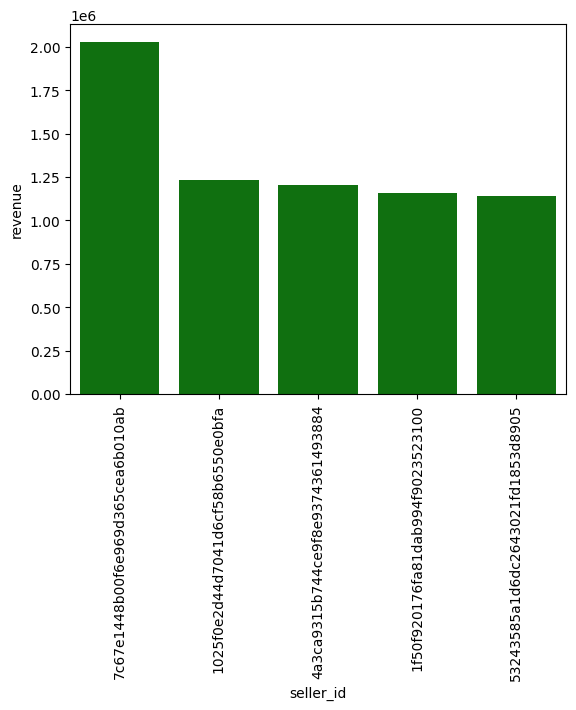

In [27]:
while cur.nextset():
    pass

query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """
cur.execute(query)
data = cur.fetchall()

df= pd.DataFrame(data, columns = ["seller_id","revenue","rank"])
df = df.head()
sns.barplot(x= "seller_id" , y = "revenue"  , data = df, color = "g")
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [29]:


while cur.nextset():
    pass

query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()

df= pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


In [34]:


while cur.nextset():
    pass

query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row ) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
sum(payments.payment_value) as payment
from payments join orders on
payments.order_id = orders.order_id
group by orders.customer_id, orders.order_purchase_timestamp
) a
order by customer_id, order_purchase_timestamp; """
cur.execute(query)
data = cur.fetchall()

df= pd.DataFrame(data, columns = ["customer id", "order purchase timestamp","price","moving average"])
df

,customer id,order purchase timestamp,price,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,458.959991,458.959991
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,269.640015,269.640015
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,781.679993,781.679993
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,717.400024,717.400024
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,428.040009,428.040009
...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,325.440012,325.440012
99436,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,252.520004,252.520004
99437,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,856.520020,856.520020
99438,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,182.000000,182.000000


# Calculate the cumulative sales per month for each year.

In [35]:
while cur.nextset():
    pass

query = """ select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a """
cur.execute(query)
data = cur.fetchall()

df= pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


# Calculate the year-over-year growth rate of total sales.

In [36]:
while cur.nextset():
    pass

query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [37]:
while cur.nextset():
    pass
    
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data #since none of our customer is repeated, thats why our value is None


[(None,)]

# Identify the top 3 customers who spent the most money in each year.

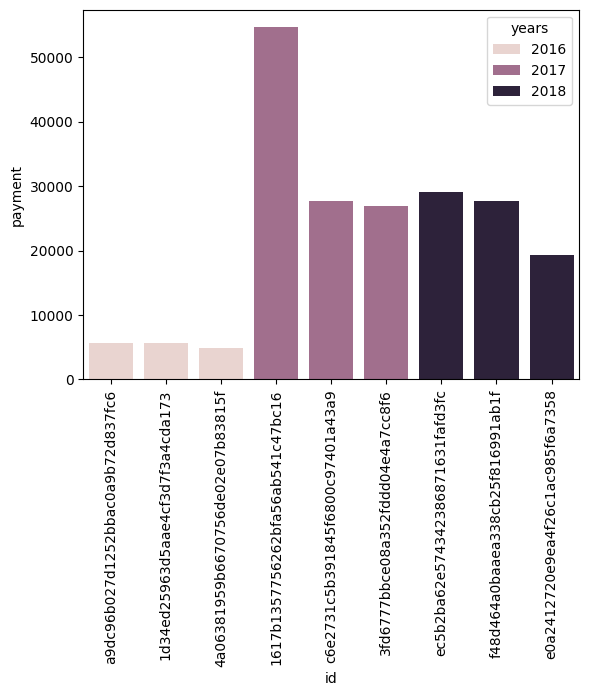

In [41]:
while cur.nextset():
    pass

query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()